In [2]:
import random

import numpy as np
import matplotlib.pyplot as plt
import os

def visualise(i: int) -> None:
    # Define paths
    output_dir = "../data/input_data_total"  # Change this to your actual directory
    image_path = os.path.join(output_dir, "images", f"image_{i}.npy")
    mask_path = os.path.join(output_dir, "masks", f"mask_{i}.npy")

    # Load data
    image = np.load(image_path)  # Shape: (H, W, D, 4)
    mask = np.load(mask_path)    # Shape: (H, W, D, 4) (one-hot encoded)

    # Select a slice for visualization
    slice_idx = image.shape[2] // 2  # Selecting the middle slice

    # Visualize the image channels
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))

    labels = ["T1C", "T1N", "T2W", "T2F"]

    # Plot each channel separately
    for i in range(4):
        axes[i].imshow(image[:, :, slice_idx, i], cmap='gray')
        axes[i].set_title(labels[i])
        axes[i].axis('off')

    # Convert mask from one-hot encoding to a single channel
    val, counts = np.unique(mask, return_counts=True)
    print("VAL: ", val)
    print("COUNTS: ", counts)
    tumor_ratio = 1 - (counts[0] / counts.sum())
    print("tumor ratio: ", tumor_ratio)
    # mask_single = np.argmax(mask, axis=-1)  # Get the class with the highest probability
    # mask_slice = mask_single[:, :, slice_idx]

    # Plot the mask
    axes[4].imshow(mask[:, :, slice_idx])
    axes[4].set_title('Mask')
    axes[4].axis('off')

    plt.show()


VAL:  [0 1 2 3]
COUNTS:  [8793393   13247  102961   18399]
tumor ratio:  0.015076948924731215


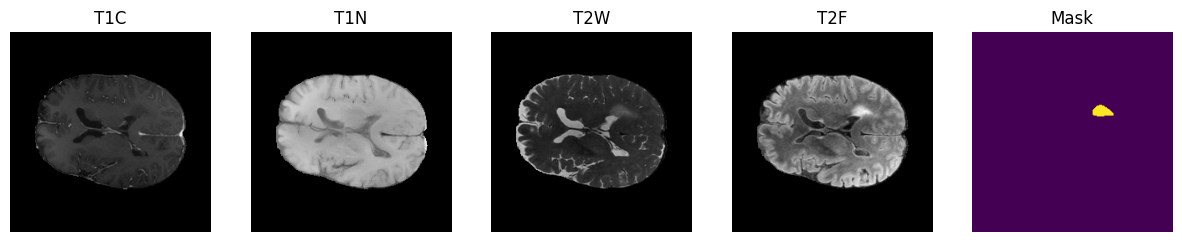

In [5]:
# for i in range(50):
#     visualise(i)
visualise(10)

In [3]:
output_dir = "../data/input_data_total"  # Change this to your actual directory

i=0

image_path = os.path.join(output_dir, "images", f"image_{i}.npy")
mask_path = os.path.join(output_dir, "masks", f"mask_{i}.npy")

# Load data
image = np.load(image_path)  # Shape: (H, W, D, 4)
mask = np.load(mask_path)    # Shape: (H, W, D, 4) (one-hot encoded)

image.shape, mask.shape

((240, 240, 155, 4), (240, 240, 155, 4))